# Лабораторная работа 6

Линейная Регрессия в sklearn

Выполнил: Новицкий Никита (6132-010402D)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pltx

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings("ignore")

#### Найти и загрузить датасет, подходящий для задачи регрессии. Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

Ссылка на датасет: https://www.kaggle.com/competitions/lightautomlcourse-hw1/data

In [2]:
train = pd.read_csv("train_data.csv", sep=",")
test = pd.read_csv("test_data.csv", sep=",")

In [3]:
train.head(3)

row_ID vehicle_manufacturer vehicle_model vehicle_category  \
0       0               TOYOTA        Aqua s            Sedan   
1       1        MERCEDES-BENZ         C 220            Sedan   
2       2              HYUNDAI      Veloster        Hatchback   

   current_mileage  vehicle_year vehicle_gearbox_type doors_cnt  \
0           133000          2014            Automatic       4/5   
1            24500          2010               Manual       4/5   
2            31000          2016            Tiptronic       2/3   

                  wheels vehicle_color vehicle_interior_color  \
0    Right-hand drive          Silver                  Black    
1           Left wheel         Silver                  Black    
2           Left wheel         Silver                  Black    

               car_vin  car_leather_interior deal_type  final_price  
0                  NaN                     0  For Sale       3650.0  
1                  NaN                     0  For Sale       6800.0  
2   KMHTC6AE3GU293912                      1  For Sale       6300.0

In [4]:
test.head(3)

row_ID vehicle_manufacturer vehicle_model vehicle_category  \
0   35000               TOYOTA         Prius        Hatchback   
1   35001              HYUNDAI       Elantra            Sedan   
2   35002                LEXUS        NX 300             Jeep   

   current_mileage  vehicle_year vehicle_gearbox_type doors_cnt  \
0           323733          2012            Automatic       4/5   
1           112000          2013            Tiptronic       4/5   
2            16920          2018            Automatic       NaN   

           wheels vehicle_color vehicle_interior_color              car_vin  \
0    Left wheel           Grey                  Black    JTDKN3DU6C5439638    
1    Left wheel           Grey                  Black            SURATSHIA    
2    Left wheel          Brown                     NaN   JTJYARBZ5J2104521    

   car_leather_interior deal_type  
0                     1  For Sale  
1                     1  For Sale  
2                     1  For Sale

Избавляемся от колонки row_ID, для нас она не несет никакой ценной информации

In [5]:
train = train.drop(["row_ID"], axis=1)
test = test.drop(["row_ID"], axis=1)

#### Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [6]:
_train = train[["current_mileage", "vehicle_year", "final_price"]]
_test = test[["current_mileage", "vehicle_year"]]

#### Визуализировать heatmap-матрицу кореллированности признаков. 

In [7]:
sns.heatmap(_train.corr(), cmap="mako")

<AxesSubplot:>

#### Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

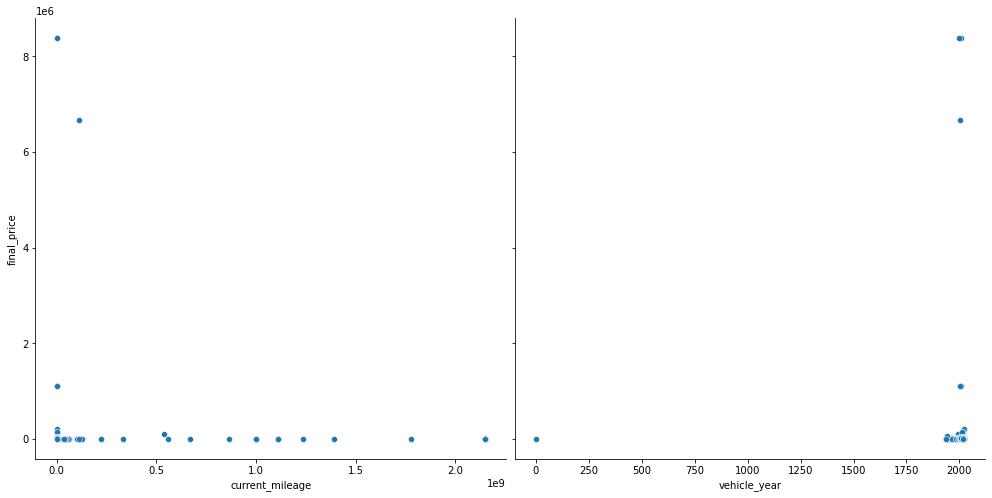

In [8]:
sns.pairplot(data=_train, x_vars = _train.drop("final_price", axis=1).columns, y_vars=["final_price"], height=7)

#### Разделить набор данных на обучающую и тестовую выборки

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    _train.drop(columns=['final_price'], axis=1), 
    _train.final_price, 
    test_size=0.45, 
    random_state=17
)

#### Линейная регрессия

Обучить модель линейной регрессии (LinearRegression)

In [10]:
LRegression = LinearRegression()
LRegression.fit(X_train, y_train)
PredictTrain = LRegression.predict(X_train)
PredictTest = LRegression.predict(X_test)

Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [11]:
def print_metrics(y_train, y_test, PredictTrain, PredictTest):
    print("Train metrics:")
    print(f"MAE: {mean_absolute_error(y_train, PredictTrain)}")
    print(f"MSE: {mean_squared_error(y_train, PredictTrain)}")
    print(f"R2: {r2_score(y_train, PredictTrain)}\n")
    print("Test metrics:")
    print(f"MAE: {mean_absolute_error(y_test, PredictTest)}")
    print(f"MSE: {mean_squared_error(y_test, PredictTest)}")
    print(f"R2: {r2_score(y_test, PredictTest)}")

In [12]:
print_metrics(y_train, y_test, PredictTrain, PredictTest)

Train metrics:
MAE: 4538.420760729169
MSE: 3750062420.911893
R2: 8.006354785350389e-05

Test metrics:
MAE: 5041.172267580659
MSE: 7393562273.414885
R2: -6.974201406384495e-05


Вывести model.coef_ и model.intercept_

In [13]:
print(f"model.coef_: {LRegression.coef_}")
print(f"model.intercept_: {LRegression.intercept_}")

model.coef_: [-1.67557111e-06  3.43740899e+01]
model.intercept_: -63319.95584288799


Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [14]:
pltx.bar(
    x=_test.columns, 
    y=LRegression.coef_, 
    labels={"x": "Feature", "y": "Importance"}, 
    title="Feature importance"
)

#### Модель Lasso

Обучить модель регрессии (Lasso), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [15]:
parametrs = {"alpha": np.arange(0.1, 151, 0.1)}
LassoRegressionCV = Lasso()
LassoRegressionCV = GridSearchCV(LassoRegressionCV, parametrs, refit=True)
LassoRegressionCV.fit(X_train, y_train)
print(f"Лучшие параметры для Lasso Regression: {LassoRegressionCV.best_params_}")

Лучшие параметры для Lasso Regression: {'alpha': 150.9}


In [16]:
LassoRegression = Lasso(alpha=150.9)
LassoRegression.fit(X_train, y_train)
PredictTrain = LassoRegression.predict(X_train)
PredictTest = LassoRegression.predict(X_test)

Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [17]:
print_metrics(y_train, y_test, PredictTrain, PredictTest)

Train metrics:
MAE: 4539.37004207233
MSE: 3750062513.811723
R2: 8.003877696127759e-05

Test metrics:
MAE: 5042.136200541173
MSE: 7393560022.721504
R2: -6.943758025168556e-05


Для наилучшей модели вывести model.coef_ и model.intercept_

In [18]:
print(f"model.coef_: {LassoRegression.coef_}")
print(f"model.intercept_: {LassoRegression.intercept_}")

model.coef_: [-1.67903060e-06  3.37584515e+01]
model.intercept_: -62082.16996226625


Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [19]:
pltx.bar(
    x=_test.columns, 
    y=LassoRegressionCV.best_estimator_.coef_, 
    labels={"x": "Feature", "y": "Importance"}, 
    title="Feature importance"
)

#### Модель Ridge

Обучить модель регрессии (Ridge), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [20]:
parametrs = {"alpha": np.arange(0.1, 151, 0.1)}
RidgeRegressionCV = Ridge()
RidgeRegressionCV = GridSearchCV(RidgeRegressionCV, parametrs, refit=True)
RidgeRegressionCV.fit(X_train, y_train)

print(f"Лучшие параметры для Ridge Regression: {RidgeRegressionCV.best_params_}")

Лучшие параметры для Ridge Regression: {'alpha': 150.9}


In [21]:
RidgeRegression = Ridge(alpha=150.9)
RidgeRegression.fit(X_train, y_train)
PredictTrain = RidgeRegression.predict(X_train)
PredictTest = RidgeRegression.predict(X_test)

Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [22]:
print_metrics(y_train, y_test, PredictTrain, PredictTest)

Train metrics:
MAE: 4538.422452780521
MSE: 3750062420.91219
R2: 8.006354777434499e-05

Test metrics:
MAE: 5041.173986284538
MSE: 7393562269.373347
R2: -6.974146739646692e-05


Для лучшей модели вывести model.coef и model.intercept

In [23]:
print(f"model.coef_: {RidgeRegression.coef_}")
print(f"model.intercept_: {RidgeRegression.intercept_}")

model.coef_: [-1.67557729e-06  3.43729906e+01]
model.intercept_: -63317.74564016102


Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [24]:
pltx.bar(
    x=_test.columns, 
    y=RidgeRegressionCV.best_estimator_.coef_, 
    labels={"x": "Feature", "y": "Importance"}, 
    title="Feature importance"
)

#### Модель ElasticNet

Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [25]:
parametrs = {
    "alpha": np.arange(0.1, 1, 0.1), 
    "l1_ratio": np.arange(0.05, 1, 0.05)
}

ElasticNetRegressionCV = ElasticNet()
ElasticNetRegressionCV = GridSearchCV(ElasticNetRegressionCV, parametrs, refit=True)
ElasticNetRegressionCV.fit(X_train, y_train)
print(f"Лучшие параметры для ElasticNet Regression: {ElasticNetRegressionCV.best_params_}")

Лучшие параметры для ElasticNet Regression: {'alpha': 0.9, 'l1_ratio': 0.05}


In [26]:
ElasticNetRegression = ElasticNet(alpha=0.9, l1_ratio=0.05)
ElasticNetRegression.fit(X_train, y_train)
PredictTrain = ElasticNetRegression.predict(X_train)
PredictTest = ElasticNetRegression.predict(X_test)

Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [27]:
print_metrics(y_train, y_test, PredictTrain, PredictTest)

Train metrics:
MAE: 4538.605122788273
MSE: 3750062424.4221215
R2: 8.00626118830916e-05

Test metrics:
MAE: 5041.359408121089
MSE: 7393561833.92425
R2: -6.968256757944324e-05


Для лучшей модели вывести model.coef и model.intercept

In [28]:
print(f"model.coef_: {ElasticNetRegression.coef_}")
print(f"model.intercept_: {ElasticNetRegression.intercept_}")

model.coef_: [-1.67624359e-06  3.42544197e+01]
model.intercept_: -63079.35020933506


Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [29]:
pltx.bar(
    x=_test.columns, 
    y=ElasticNetRegressionCV.best_estimator_.coef_, 
    labels={"x": "Feature", "y": "Importance"}, 
    title="Feature importance"
)

Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

Лучшая модель: Lasso Regression

Значение метрик: 

Train metrics:

MAE: 4539.37004207233

MSE: 3750062513.811723

R2: 8.003877696127759e-05

Test metrics:

MAE: 5042.136200541173

MSE: 7393560022.721504

R2: -6.943758025168556e-05

In [30]:
BestLasso = LassoRegressionCV.best_estimator_

Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ). Обучаем лучшую модель.

In [31]:
train = train[['current_mileage','vehicle_year','final_price','vehicle_manufacturer','vehicle_category','vehicle_gearbox_type','car_leather_interior','deal_type']]
train = pd.get_dummies(train, drop_first=False, \
                       columns=['vehicle_manufacturer','vehicle_category','vehicle_gearbox_type','car_leather_interior','deal_type'])
feature_names = train.columns
feature_names = list(feature_names[:-1])
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['final_price']), train.final_price, test_size=0.33, random_state=42)

In [32]:
BestLasso.fit(X_train, y_train)
PredictTrain = BestLasso.predict(X_train)
PredictTest = BestLasso.predict(X_test)

Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

In [33]:
print_metrics(y_train, y_test, PredictTrain, PredictTest)

Train metrics:
MAE: 4271.94956316186
MSE: 3131543538.546992
R2: 0.0021041387458017313

Test metrics:
MAE: 5078.164264920849
MSE: 9955229134.665777
R2: 0.0005223761491911505


Значение каждой метрики на тренировчном и тестовом наборах улучшились

Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
BestLasso.fit(X_train, y_train)
PredictTrain = BestLasso.predict(X_train)
PredictTest = BestLasso.predict(X_test)

In [36]:
print_metrics(y_train, y_test, PredictTrain, PredictTest)

Train metrics:
MAE: 4218.196176689218
MSE: 3128031589.774598
R2: 0.003223254319885127

Test metrics:
MAE: 5000.8218154452
MSE: 9955675650.399094
R2: 0.00047754719768122733


Standart Scaler ухудшил значения по каждой из метрик

Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

In [37]:
pltx.bar(
    x=feature_names, 
    y=BestLasso.coef_, 
    labels={"x": "Feature", "y": "Importance"}, 
    title="Feature importance"
)